# Analysis of cross-validation results

In [175]:
import numpy as np

In [176]:
t = np.loadtxt('rotation_update_pj.csv')

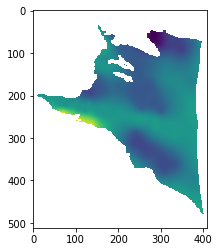

In [177]:
plt.imshow(t, origin='lower')

In [178]:
import pickle
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

from mpstool.cv_metrics import brier_score, zero_one_score, balanced_linear_score

from geone.img import readImageGslib, readPointSetGslib
from geone.img import Img
from geone.imgplot import drawImage2D
from geone.deesseinterface import DeesseEstimator

from geone import imgplot
from geone.img import writePointSetGslib, readPointSetGslib, pointSetToImage

In [179]:
OUTPUT_DIR = 'output/'
DATA_DIR = 'data_roussillon/'
SAMPLES_DIR = DATA_DIR

## Parameter selection (Roussillon)

The datasets with 600 points. Need to run `2-results.py` which performs cross-validation and writes results to the csv.

In [180]:
df_roussillon = pd.read_csv('df_roussillon.csv', index_col=0)
df_roussillon.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_distanceThreshold,param_maxScanFraction,param_nneighboringNode,params,split0_test_brier,split1_test_brier,...,std_test_brier,rank_test_brier,split0_test_skill_brier,split1_test_skill_brier,split2_test_skill_brier,split3_test_skill_brier,split4_test_skill_brier,mean_test_skill_brier,std_test_skill_brier,rank_test_skill_brier
0,0.000993,0.000024,129.224922,0.462563,"[0.12501, 0.1]",0.1,"[8, 1]","{'distanceThreshold': [0.12501, 0.1], 'maxScan...",-0.396292,-0.453594,...,0.049748,21,0.165015,0.044280,0.173004,0.330193,0.329941,0.208487,0.109249,21
1,0.000976,0.000056,126.292234,4.236635,"[0.12501, 0.1]",0.2,"[8, 1]","{'distanceThreshold': [0.12501, 0.1], 'maxScan...",-0.411146,-0.450948,...,0.047465,22,0.133717,0.049855,0.209306,0.321237,0.313057,0.205434,0.104265,22
2,0.001001,0.000013,129.498730,0.648454,"[0.12501, 0.1]",0.4,"[8, 1]","{'distanceThreshold': [0.12501, 0.1], 'maxScan...",-0.396156,-0.445260,...,0.043132,24,0.165300,0.061838,0.149871,0.308010,0.305741,0.198152,0.095536,24
3,0.000901,0.000046,124.915347,1.118605,"[0.12501, 0.1]",0.8,"[8, 1]","{'distanceThreshold': [0.12501, 0.1], 'maxScan...",-0.407844,-0.467865,...,0.045956,28,0.140675,0.014211,0.097569,0.275324,0.273259,0.160208,0.101639,28
4,0.000933,0.000070,108.698390,0.544352,"[0.25001, 0.1]",0.1,"[8, 1]","{'distanceThreshold': [0.25001, 0.1], 'maxScan...",-0.487073,-0.603667,...,0.050528,41,-0.026261,-0.271923,-0.182244,-0.044130,0.034688,-0.097974,0.112251,41


In [181]:
df_sorted = df_roussillon.sort_values('rank_test_brier', ascending=True)
df_sorted[['mean_score_time', 'param_distanceThreshold', 'param_maxScanFraction', 'param_nneighboringNode', 'mean_test_brier', 'std_test_brier']]

,mean_score_time,param_distanceThreshold,param_maxScanFraction,param_nneighboringNode,mean_test_brier,std_test_brier
20,182.169288,"[0.06251, 0.1]",0.1,"[32, 1]",-0.312848,0.046924
21,178.729551,"[0.06251, 0.1]",0.2,"[32, 1]",-0.322479,0.032288
23,294.807481,"[0.06251, 0.1]",0.8,"[32, 1]",-0.324254,0.034422
36,191.765087,"[0.03126, 0.1]",0.1,"[64, 1]",-0.329104,0.034577
22,172.108105,"[0.06251, 0.1]",0.4,"[32, 1]",-0.329350,0.033295
37,179.712859,"[0.03126, 0.1]",0.2,"[64, 1]",-0.331606,0.032176
39,379.288599,"[0.03126, 0.1]",0.8,"[64, 1]",-0.334727,0.028549
38,303.787415,"[0.03126, 0.1]",0.4,"[64, 1]",-0.335873,0.028401
40,184.619265,"[0.06251, 0.1]",0.1,"[64, 1]",-0.342706,0.036357
41,175.666733,"[0.06251, 0.1]",0.2,"[64, 1]",-0.345396,0.033509


In [214]:
def transform_entries(df_original):
    new_columns = {
    "param_distanceThreshold" : "t",
    "param_maxScanFraction" : "f",
    "param_nneighboringNode" : "n",
    "mean_score_time" : "time",
    "mean_test_brier" : "score",
    "std_test_brier" : "score std"
    }

    df = df_original.rename(columns=new_columns)
    df['time'] = df['time'].apply(lambda x: x/40).round(1)
    df['t'] = df['t'].apply(lambda x: eval(x)[0])
    df['n'] = df['n'].apply(lambda x: eval(x)[0])
    df['score'] = df['score'].round(2)
    df["score std"] = df["score std"].round(2)
    
    columns = ['n', 't', 'f', 'time', 'score', 'score std']
    return df[columns].head()

In [216]:
transform_entries(df_sorted).to_latex('figures/roussillon-table-ds.tex', index=False)

In [182]:
df_dsbc_roussillon = pd.read_csv('df_dsbc_roussillon.csv', index_col=0)

In [218]:
df_dsbc_sorted = df_dsbc_roussillon.sort_values('rank_test_brier', ascending=True)
df_dsbc_sorted[['mean_score_time', 'param_distanceThreshold', 'param_maxScanFraction', 'param_nneighboringNode', 'mean_test_brier', 'std_test_brier']].head(-10)

,mean_score_time,param_distanceThreshold,param_maxScanFraction,param_nneighboringNode,mean_test_brier,std_test_brier
26,170.815525,"[1e-05, 0.1]",0.020,"[16, 1]",-0.287840,0.036715
34,170.174281,"[1e-05, 0.1]",0.060,"[16, 1]",-0.292675,0.033997
30,169.880360,"[1e-05, 0.1]",0.040,"[16, 1]",-0.294056,0.028436
46,165.139261,"[1e-05, 0.1]",0.200,"[16, 1]",-0.294860,0.025568
38,167.183764,"[1e-05, 0.1]",0.080,"[16, 1]",-0.294935,0.029452
22,170.241511,"[1e-05, 0.1]",0.010,"[16, 1]",-0.297571,0.038998
37,181.118044,"[1e-05, 0.1]",0.080,"[32, 1]",-0.297837,0.031636
29,181.388542,"[1e-05, 0.1]",0.040,"[32, 1]",-0.298404,0.031788
42,168.204787,"[1e-05, 0.1]",0.100,"[16, 1]",-0.298802,0.034168
33,180.554313,"[1e-05, 0.1]",0.060,"[32, 1]",-0.300129,0.039439


In [219]:
transform_entries(df_dsbc_sorted).drop(columns=['t']).to_latex('figures/roussillon-table-dsbc.tex', index=False)

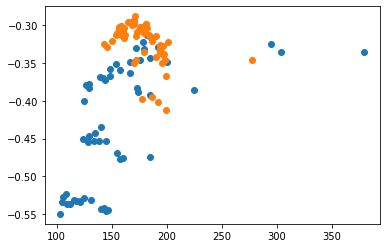

In [184]:
plt.scatter(df_roussillon['mean_score_time'], df_roussillon['mean_test_brier'])
plt.scatter(df_dsbc_roussillon['mean_score_time'], df_dsbc_roussillon['mean_test_brier'])

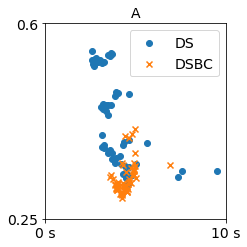

In [207]:
fig, ax = plt.subplots(figsize=(3.54330709,3.54330709))
ax.scatter(x=df_roussillon['mean_score_time']/40, y=-df_roussillon['mean_test_brier'])
ax.scatter(x=df_dsbc_roussillon['mean_score_time']/40, y=-df_dsbc_roussillon['mean_test_brier'], marker='x')
ax.set(xlim=[0,10], ylim=[0.25,0.6])
ax.set_xticks([0,10])
ax.set_yticks([0.25,0.6])
ax.set_xticklabels(['0 s','10 s'], fontsize=14)
ax.set_yticklabels(['0.25','0.6'], fontsize=14)
ax.legend(['DS', 'DSBC'], fontsize=14)
ax.set_title('A', fontsize=14)
fig.tight_layout()
fig.savefig(f'figures/roussillon-scatter.pdf', dpi=300)

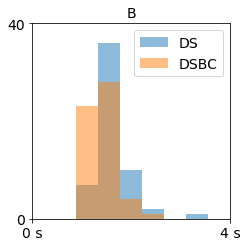

In [208]:
fig, ax = plt.subplots(figsize=(3.54330709,3.54330709))
ax.hist((-df_roussillon['mean_test_brier'])*df_roussillon['mean_score_time']/40, bins=np.linspace(0,4,10), alpha=0.5)
ax.hist((-df_dsbc_roussillon['mean_test_brier'])*df_dsbc_roussillon['mean_score_time']/40, bins=np.linspace(0,4,10), alpha=0.5)
ax.set(xlim=[0,4], ylim=[0, 40])
ax.set_xticks([0,4])
ax.set_yticks([0, 40])
ax.set_xticklabels(['0 s','4 s'], fontsize=14)
ax.set_yticklabels(['0','40'], fontsize=14)
ax.legend(['DS', 'DSBC'], fontsize=14)
ax.set_title('B', fontsize=14)
fig.tight_layout()
fig.savefig(f'figures/roussillon-histogram.pdf', dpi=300)

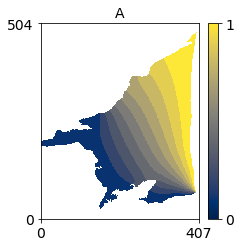

In [187]:
trend = readImageGslib('./data_roussillon/trend.gslib')
plt.figure(figsize=(3.54330709,3.54330709))
imgplot.drawImage2D(trend,
                cmap='cividis',
                excludedVal=-9999999,
                cticks=[0,1],
                vmin=0, vmax=1,
                cticklabels_fontsize=14,
                xticklabels_fontsize=14,
                yticklabels_fontsize=14,
                xticks=[0,407],
                yticks=[0,504],
                title='A',
                title_fontsize=14
                
               )
plt.tight_layout()
plt.savefig(f'figures/roussillon-ti-A.pdf', dpi=300)

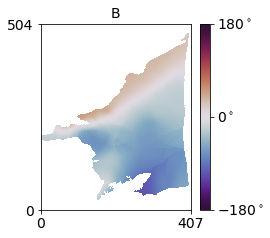

In [188]:
orientation = readImageGslib('./data_roussillon/orientation.gslib')
orientation.val = ((orientation.val + 2000) * (trend.val != -9999999) -2000)
plt.figure(figsize=(3.54330709,3.54330709))
imgplot.drawImage2D(orientation,
                cmap='twilight_shifted',
                excludedVal=-2000,
                cticks=[-180,0,180],
                cticklabels=['$-180^\circ$','$0^\circ$', '$180^\circ$'],
                vmin=-180, vmax=180,
                cticklabels_fontsize=14,
                xticklabels_fontsize=14,
                yticklabels_fontsize=14,
                xticks=[0,407],
                yticks=[0,504],
                title='B',
                title_fontsize=14
                
               )
plt.tight_layout()
plt.savefig(f'figures/roussillon-ti-B.pdf', dpi=300)

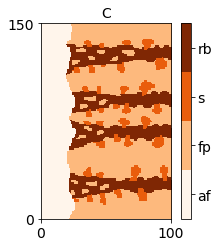

In [189]:
ti = readImageGslib('./data_roussillon/trueTI.gslib')
plt.figure(figsize=(3.54330709,3.54330709))
imgplot.drawImage2D(ti,
                categ=True,
                cmap=plt.cm.get_cmap('Oranges', 4),
                cticklabels=['af', 'fp', 's', 'rb'],
                cticklabels_fontsize=14,
                xticklabels_fontsize=14,
                yticklabels_fontsize=14,
                xticks=[0,100],
                yticks=[0,150],
                title='C',
                title_fontsize=14
                
               )
plt.tight_layout()
plt.savefig(f'figures/roussillon-ti-C.pdf', dpi=300)

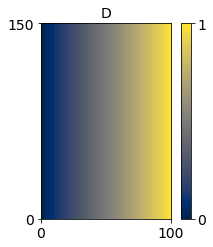

In [190]:
plt.figure(figsize=(3.54330709,3.54330709))
imgplot.drawImage2D(ti,
                categ=False,
                cmap='cividis',
                cticks=[0,1],
                vmax=1,
                cticklabels_fontsize=14,
                xticklabels_fontsize=14,
                yticklabels_fontsize=14,
                xticks=[0,100],
                yticks=[0,150],
                title='D',
                title_fontsize=14,
                iv=1 
               )
plt.tight_layout()
plt.savefig(f'figures/roussillon-ti-D.pdf', dpi=300)

In [191]:
observations.val

array([[276.5, 306.5, 343.5, ..., 333.5, 218.5, 270.5],
       [157.5, 299.5, 234.5, ..., 126.5, 162.5, 284.5],
       [  0.5,   0.5,   0.5, ...,   0.5,   0.5,   0.5],
       [  1. ,   3. ,   1. , ...,   1. ,   1. ,   1. ]])

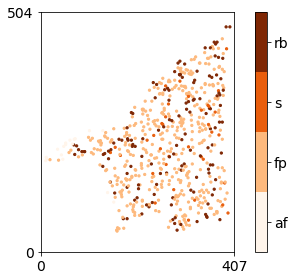

In [206]:
fig, ax = plt.subplots()
pcm = ax.scatter(observations.val[0,:],
           observations.val[1,:],
           c=observations.val[3,:],
           cmap=plt.cm.get_cmap('Oranges', 4),
           s=5,)

ax.set_aspect('equal')
ax.set(xlim=[0,407], ylim=[0,504], xticks=[0,407], yticks=[0,504])
ax.tick_params(labelsize=14)
#ax.set_title('observations', fontsize=14)
cbar = fig.colorbar(pcm, ax=ax, ticks=np.arange(4)*3/4 + 3/8)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_yticklabels(['af', 'fp', 's', 'rb'])
fig.tight_layout()
fig.savefig(f'figures/roussillon-observations.pdf', dpi=300)

In [193]:
from geone.deesseinterface import DeesseClassifier

In [194]:
DATA_DIR = 'data_roussillon/'
ti_true = readImageGslib(DATA_DIR+'trueTI.gslib')
mask = readImageGslib(DATA_DIR+'mask.gslib')
trend = readImageGslib(DATA_DIR+'trend.gslib')
im_angle = readImageGslib(DATA_DIR+'orientation.gslib')
nx, ny, nz = mask.nx, mask.ny, mask.nz      # number of cells
sx, sy, sz = mask.sx, mask.sy, mask.sz      # cell unit
ox, oy, oz = mask.ox, mask.oy, mask.oz      # origin (corner of the "first" grid cell)

In [195]:
hd = readPointSetGslib('data_roussillon/roussillon_observations_600.gslib')

In [196]:
deesse_input = geone.deesseinterface.DeesseInput(
    nx=nx, ny=ny, nz=nz,
    sx=sx, sy=sy, sz=sz,
    ox=ox, oy=oy, oz=oz,
    nv=2, varname=['Facies', 'trend'],
    nTI=1, TI=ti_true,
    mask=mask.val,
    rotationUsage=1,            # use rotation without tolerance
    rotationAzimuthLocal=True,  #    rotation according to azimuth: local
    rotationAzimuth=im_angle.val[0,:,:,:],      #    rotation azimuth: map of values
    dataImage=trend,
    dataPointSet=hd,
    outputVarFlag=[True, False],
    distanceType=[0,1],
    nneighboringNode=[32,1],
    distanceThreshold=[0.06251, 0.1],
    maxScanFraction=0.1,
    npostProcessingPathMax=1,
    seed=20191201,
    nrealization=1,
)

In [197]:
ds_example = geone.deesseinterface.deesseRun(deesse_input,
                                             verbose=0)['sim'][0]

In [198]:
dsbc_input = geone.deesseinterface.DeesseInput(
    nx=nx, ny=ny, nz=nz,
    sx=sx, sy=sy, sz=sz,
    ox=ox, oy=oy, oz=oz,
    nv=2, varname=['Facies', 'trend'],
    nTI=1, TI=ti_true,
    mask=mask.val,
    rotationUsage=1,            # use rotation without tolerance
    rotationAzimuthLocal=True,  #    rotation according to azimuth: local
    rotationAzimuth=im_angle.val[0,:,:,:],      #    rotation azimuth: map of values
    dataImage=trend,
    dataPointSet=hd,
    outputVarFlag=[True, False],
    distanceType=[0,1],
    nneighboringNode=[16,1],
    distanceThreshold=[1e-5, 0.1],
    maxScanFraction=0.02,
    npostProcessingPathMax=1,
    seed=20191201,
    nrealization=1,
)

In [199]:
dsbc_example = geone.deesseinterface.deesseRun(dsbc_input,
                                             verbose=0)['sim'][0]

In [200]:
def plot_example(example, title):
    plt.figure(figsize=(3.54330709,3.54330709))
    imgplot.drawImage2D(example,
                categ=True,
                cmap=plt.cm.get_cmap('Oranges', 4),
                cticklabels=['af', 'fp', 's', 'rb'],
                cticklabels_fontsize=14,
                xticklabels_fontsize=14,
                yticklabels_fontsize=14,
                xticks=[0,407],
                yticks=[0,504],
                title=title,
                title_fontsize=14
                
               )
    plt.tight_layout()
    plt.savefig(f'figures/roussillon-ex-{title}.pdf', dpi=300)

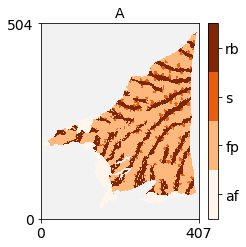

In [203]:
plot_example(ds_example, 'A')

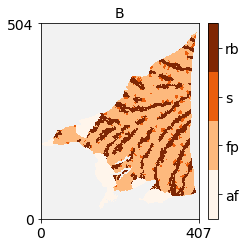

In [204]:
plot_example(dsbc_example, 'B')

In [ ]:
def best_results_for_each_TI(nsamples, score, score_name):
    df = pd.read_csv(OUTPUT_DIR+'roussillon_observations_{}.csv'.format(nsamples))
    info = ['param_TI',
        'param_distanceThreshold',
        'param_maxScanFraction',
        'param_nneighboringNode',
        ]
    ref = reference_score(observation_filename=SAMPLES_DIR+'roussillon_observations_{}.gslib'.format(nsamples),
                          score=score, varname='Facies_real00000')
    df['ref_score'] = ref
    df1 = df[df['param_TI'] == 'data/trueTI.gslib'].sort_values('mean_test_'+score_name,ascending=False).head(1)
    df2 = df[df['param_TI'] == 'data/analogTI.gslib'].sort_values('mean_test_'+score_name,ascending=False).head(1)
    return df1.append(df2, ignore_index=True)

In [ ]:
info = ['param_TI',
        'param_distanceThreshold',
        'param_maxScanFraction',
        'param_nneighboringNode',
        'mean_test_score',
        'score_method',
        'nsamples',
        'ref_score'
       ]

df_best_roussillon = pd.DataFrame()
for nsamples in [50, 150, 600]:
    for score in [(brier_score, 'brier'), (zero_one_score, 'zero_one'), (balanced_linear_score, 'linear')]:
        df = best_results_for_each_TI(nsamples, score[0], score[1])
        df['mean_test_score'] = df['mean_test_{}'.format(score[1])]
        df['score_method'] = score[1]
        df['nsamples'] = nsamples
        df_best_roussillon = df_best_roussillon.append(df[info],ignore_index=True)
df_best_roussillon  

In [ ]:
new_columns = {
    "param_TI" : "TI",
    "param_distanceThreshold" : "t",
    "param_maxScanFraction" : "f",
    "param_nneighboringNode" : "n",
    "mean_test_score" : "score",
    "ref_score" : "reference",   
    "score_method" : "function",
    "nsamples" : "wells",
}

df_renamed = df_original.rename(columns=new_columns)
df_renamed.head()